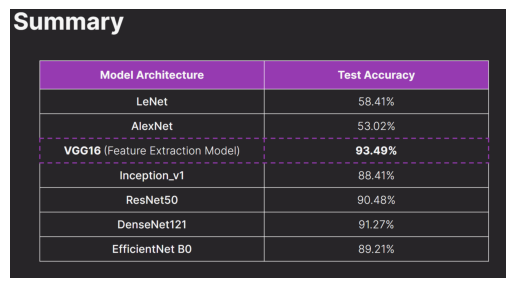

In [39]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


# Load and preprocess the image
summary_path = r'C:\Users\Praphul\Downloads\Model_Summary.png'
summary = Image.open(summary_path)

# Display the original image
plt.imshow(summary)
plt.axis('off')  # Hide axes
plt.show()


#### Indexes and class labels

__{'cycling': 0, 'dancing': 1, 'drinking': 2, 'eating': 3, 'sitting': 4}__

### Import the best model and load the custom weights

In [50]:
import torch
import torchvision.models as models

# Load a pre-trained model
model = models.vgg16(pretrained=False)  # Make sure to set pretrained=False to load your own weights

# Modify the final layer to match your number of classes if necessary
num_classes = 5  # Example: for 5 classes
model.classifier[6] = torch.nn.Linear(4096, num_classes)


In [41]:
model_weights_path = r'C:\Users\Praphul\Downloads\best_model.pth'

# Load the weights
model.load_state_dict(torch.load(model_weights_path, map_location=torch.device('cpu')))
model.eval() 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Define the Transforms and Import your image

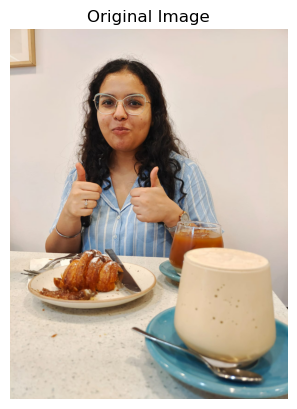

In [48]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation to match the input requirements of VGG16
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load and preprocess the image
image_path = r'C:\Users\Praphul\Downloads\Test_Image2.jpeg'  # Replace with the actual path to your image
image = Image.open(image_path).convert('RGB')

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Hide axes
plt.show()

# Apply the transformations
input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device


### Make predictions using our model

In [49]:
# Make prediction
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output, 1)

# Define the class labels
class_labels = {0: 'cycling', 1: 'dancing', 2: 'drinking', 3: 'eating', 4: 'sitting'}

# Print the prediction
predicted_label = class_labels[predicted.item()]
print(f"Predicted activity: {predicted_label}")


Predicted activity: eating
